### Mini Project
#### Nikhita Kannam

##### Abalone Data Set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error , mean_squared_error, r2_score , classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import Lasso

In [2]:
columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']

In [3]:
df = pd.read_csv('abalone.csv', names = columns)

In [4]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


The Abalone dataset is a dataset from the University of California Irvine's ML repository. The dataset can be found at this link: https://archive.ics.uci.edu/ml/datasets/Abalone

Abalones are marine snails. Researchers determine the age of an abalone by cutting open their shells and counting the rings. Rings and age are directly related, adding 1.5 to the amount of rings will give us the age of the Abalone. Measurements such as Lenght, Height and Weight also help us predict the age. 

I choose this dataset because I wanted to do use a dataset related to animals. This is also a dataset that allows me to learn something fairly new. 

I hope to learn how certain factors of the Abalone's dimensions effects not only it's age but it's other feature. For example, I'm am interested to see if there is a correlation between it's diameter and it's weight. 

My hypothesis is that the bigger the diameter, the more rings there will be and therefore the abalone will be older. The diameter will have the most correlation with the amount of rings. 

We will start by viewing the summeries of the data. 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [6]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


This dataset has 9 columns and 4177 entries. So far there are no null values in the dataset. However, I notice that the minimum value of height is 0. It doesn't seem plausible that an abalone would have a height of 0. This could be a mistake. 

### Histograms

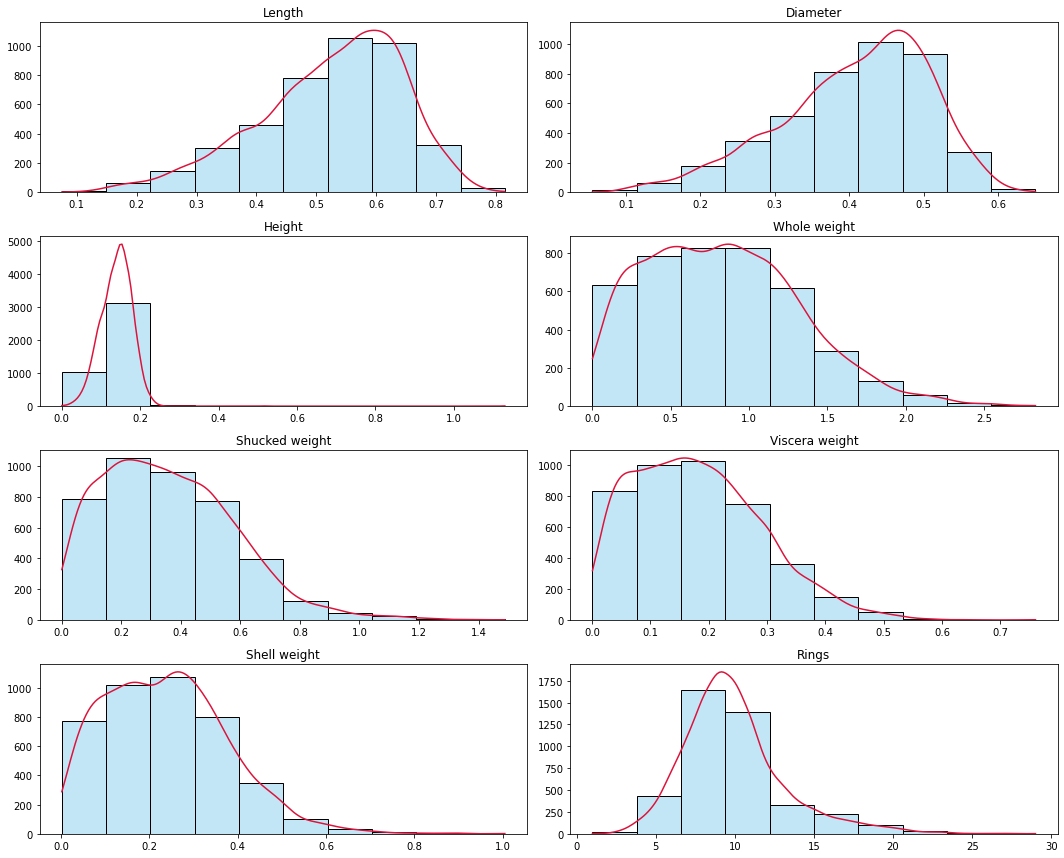

In [7]:
pal =sns.set_palette(sns.color_palette(['#89CFF0']))
numerical = df.select_dtypes(include=["float64", 'int64'])
fig, ax = plt.subplots(5,2,figsize=(15,15))
ax = ax.ravel()
pos = 0
for column in numerical.columns:
    sns.histplot(data = df[column], ax=ax[pos], kde=True, bins=10).set_title(column)
    ax[pos].set(xlabel = None, ylabel=None)
    ax[pos].lines[0].set_color('crimson')
    pos+=1


plt.tight_layout()
for i in range(8,10):
        plt.delaxes(ax[i])

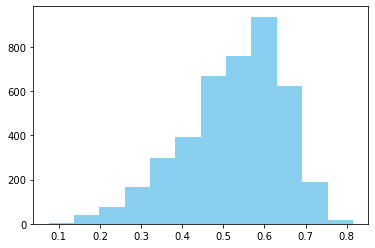

In [8]:
plt.hist(df['Length'], bins=12)
plt.show()

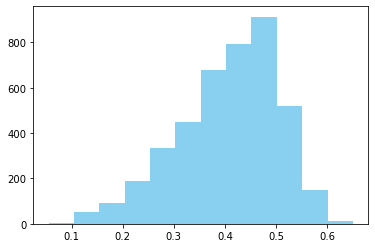

In [9]:
plt.hist(df['Diameter'], bins=12)
plt.show()

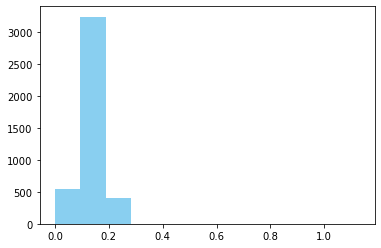

In [10]:
plt.hist(df['Height'], bins=12)
plt.show()

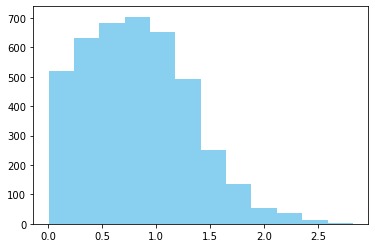

In [11]:
plt.hist(df['Whole weight'], bins=12)
plt.show()

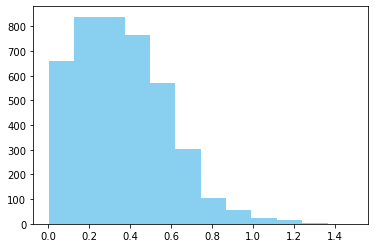

In [12]:
plt.hist(df['Shucked weight'], bins=12)
plt.show()

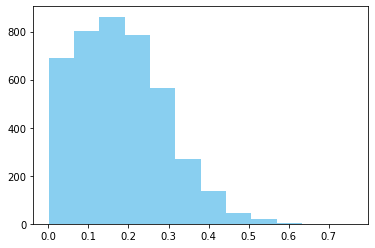

In [13]:
plt.hist(df['Viscera weight'], bins=12)
plt.show()

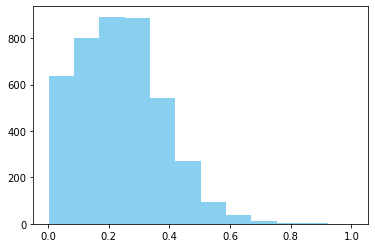

In [14]:
plt.hist(df['Shell weight'], bins=12)
plt.show()

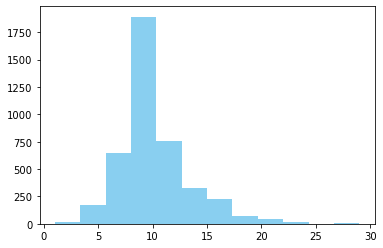

In [15]:
plt.hist(df['Rings'], bins=12)
plt.show()

For variables such as Length and Diameter, the historgrams are left skewed, meaning that there measurements tend to be higher. However, the Weight variables skew mostly right, meaning the weight tends to be smaller. The heights of the abalone seem relatively small. The number of rings each abalone has is concentrated between the values of 5 and 15. 

Sex is a not a numeric variable so the histogram will appear a little different.

<AxesSubplot:xlabel='Sex', ylabel='count'>

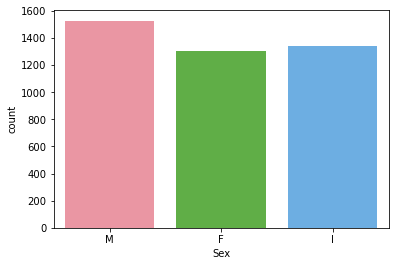

In [16]:
sns.countplot(df['Sex'])

This is a count of each Sex, the counts seem mostly equal. 

### Violin Plots

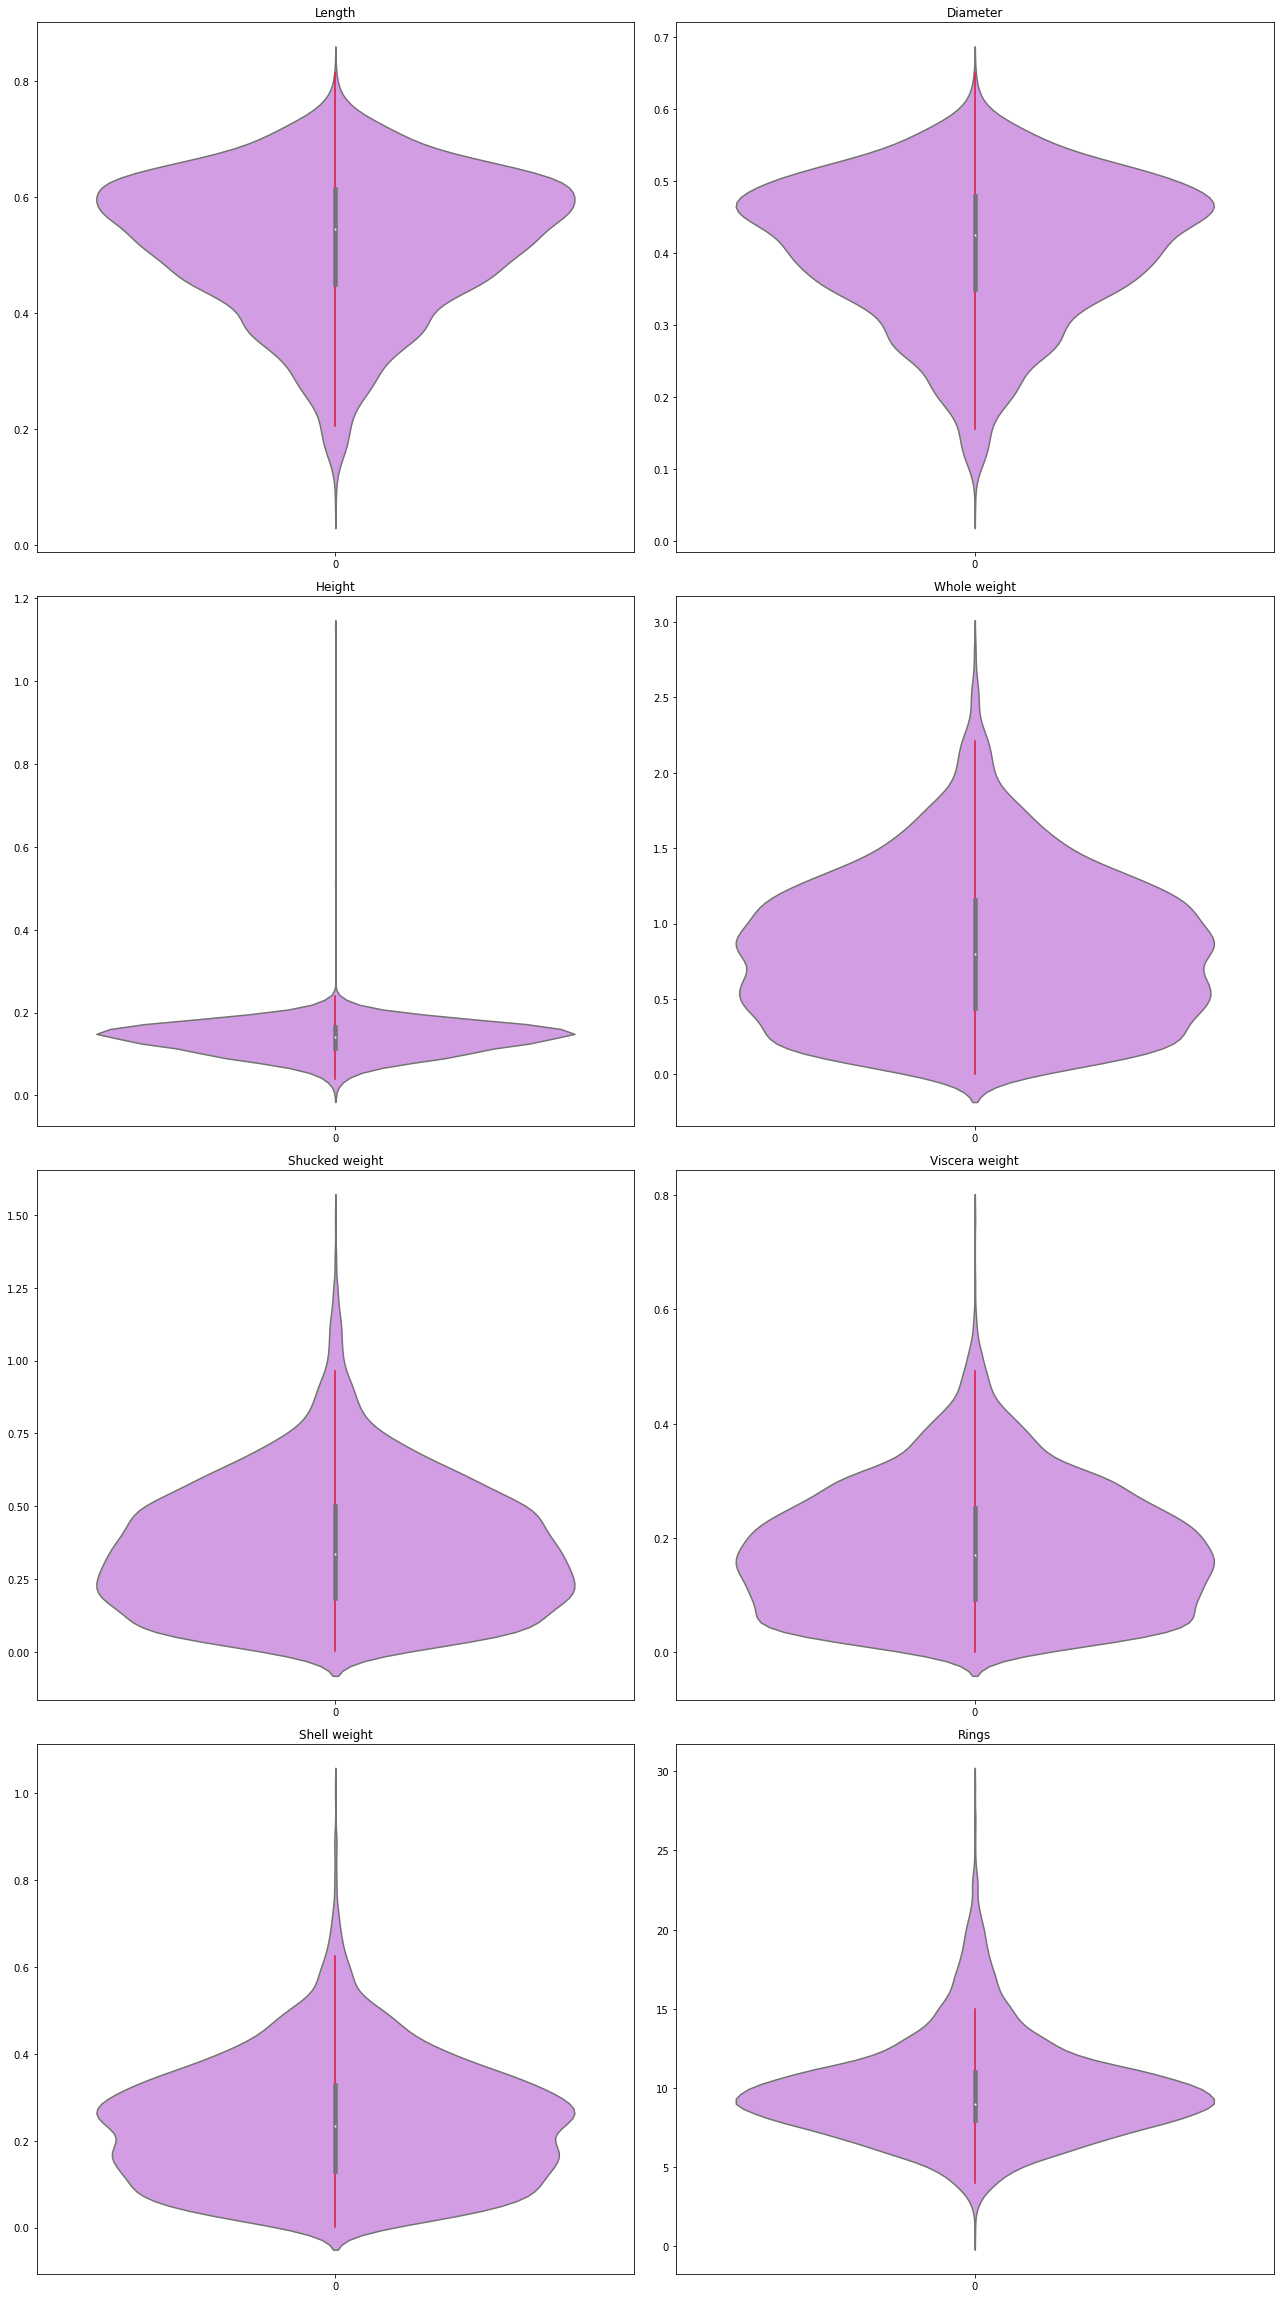

In [17]:
pal =sns.set_palette(sns.color_palette(['#D891EF']))
numerical = df.select_dtypes(include=["float64", 'int64'])
fig, ax = plt.subplots(5,2,figsize=(18,40))
ax = ax.ravel()
pos = 0
for column in numerical.columns:
    sns.violinplot(data = df[column], ax=ax[pos], kde=True, bins=10).set_title(column)
    ax[pos].set(xlabel = None, ylabel=None)
    ax[pos].lines[0].set_color('crimson')
    pos+=1


plt.tight_layout()
for i in range(8,10):
        plt.delaxes(ax[i])

<AxesSubplot:xlabel='Length'>

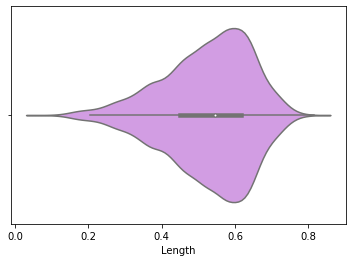

In [18]:
sns.violinplot(df['Length'])

<AxesSubplot:xlabel='Diameter'>

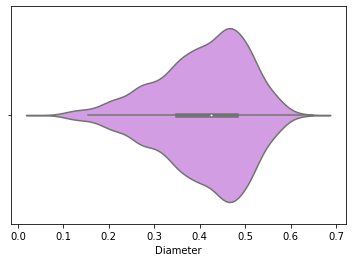

In [19]:
sns.violinplot(df['Diameter'])

<AxesSubplot:xlabel='Height'>

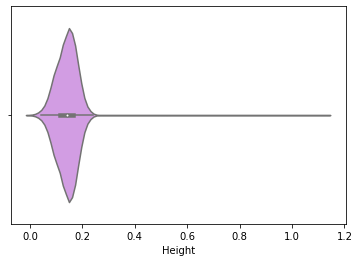

In [20]:
sns.violinplot(df['Height'])

<AxesSubplot:xlabel='Whole weight'>

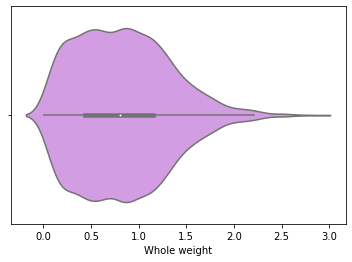

In [21]:
sns.violinplot(df['Whole weight'])

<AxesSubplot:xlabel='Shucked weight'>

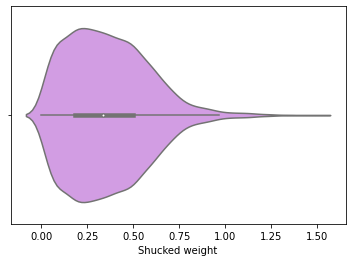

In [22]:
sns.violinplot(df['Shucked weight'])

<AxesSubplot:xlabel='Viscera weight'>

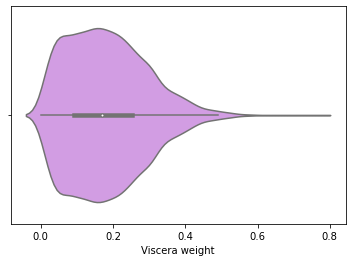

In [23]:
sns.violinplot(df['Viscera weight'])

<AxesSubplot:xlabel='Shell weight'>

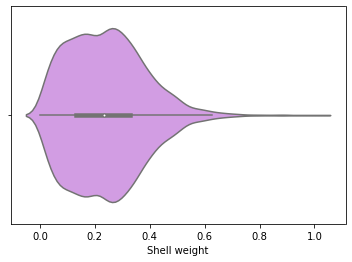

In [24]:
sns.violinplot(df['Shell weight'])

<AxesSubplot:xlabel='Rings'>

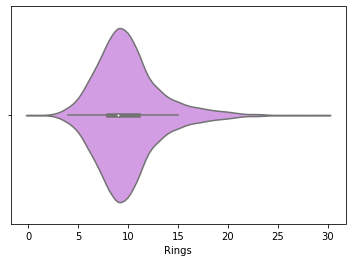

In [25]:
sns.violinplot(df['Rings'])

Similar to our findings for the histograms, the Length, Diameter and Heights tended to have higher values. While weight tends to be lower

### Matrix of scatterplots

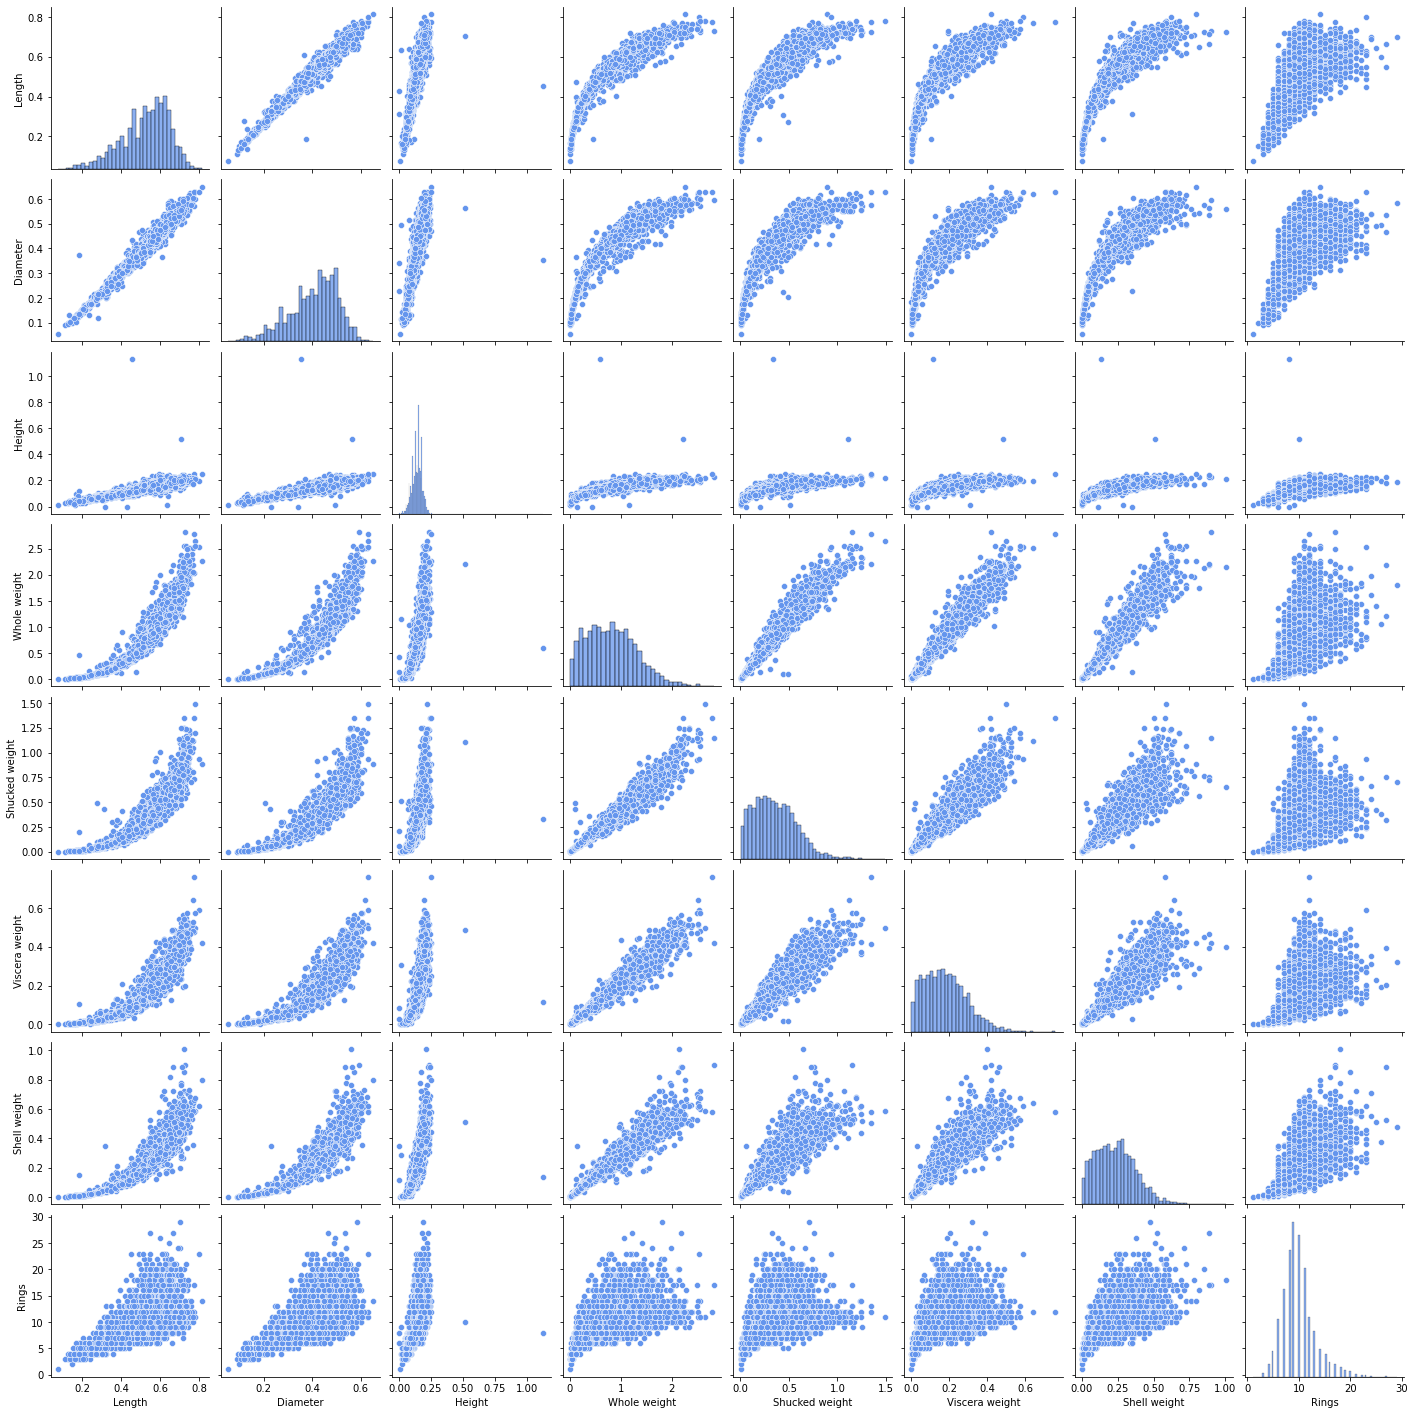

In [26]:
pal =sns.set_palette(sns.color_palette(['#6495ED']))
sns.pairplot(df, palette ='flare')

There are several outliers that are visible in this matrix. For example height and diameter have several outliers. 

### Boxplots

I will be plotting boxplots to view the outliers for each of the variables more clearly. 

<AxesSubplot:xlabel='Length'>

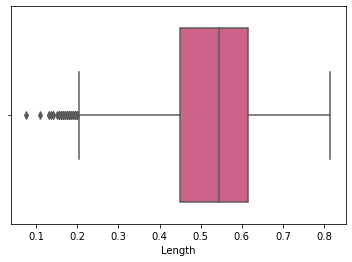

In [27]:
pal =sns.set_palette(sns.color_palette(['#DE5285']))
sns.boxplot(x = df['Length'])

<AxesSubplot:xlabel='Diameter'>

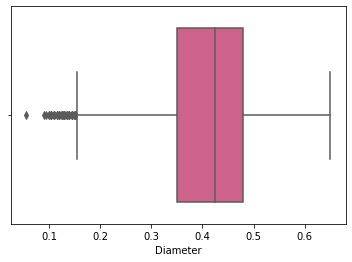

In [28]:
sns.boxplot(x = df['Diameter'])

<AxesSubplot:xlabel='Height'>

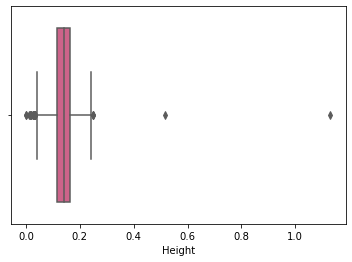

In [29]:
sns.boxplot(x = df['Height'])

<AxesSubplot:xlabel='Whole weight'>

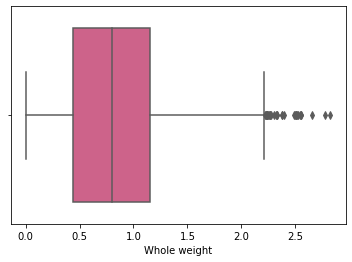

In [30]:
sns.boxplot(x = df['Whole weight'])

<AxesSubplot:xlabel='Shucked weight'>

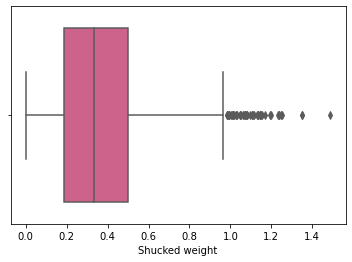

In [31]:
sns.boxplot(x = df['Shucked weight'])

<AxesSubplot:xlabel='Viscera weight'>

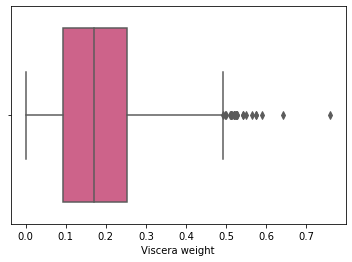

In [32]:
sns.boxplot(x = df['Viscera weight'])

<AxesSubplot:xlabel='Shell weight'>

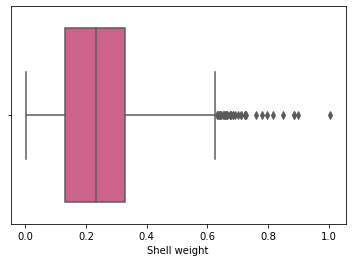

In [33]:
sns.boxplot(x = df['Shell weight'])

<AxesSubplot:xlabel='Rings'>

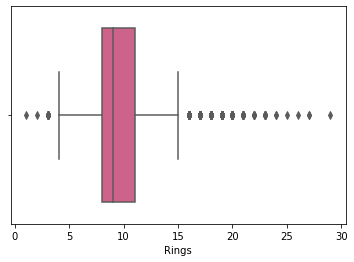

In [34]:
sns.boxplot(x = df['Rings'])

Based on the boxplots there are several outliers for each of the variables. Some outliers are not too far off the first or third quartile. However, I will remove those which are too far off. 

### Removing outliers

In [35]:
df = df[df['Length'] >.15]
df = df[df['Diameter'] >.08]
df = df[df['Height'] <.4]
df = df[df['Shucked weight'] <1.35]
df = df[df['Whole weight'] <2.3]
df = df[df['Viscera weight'] <.6]
df = df[df['Shell weight'] <.75]
df = df[df['Rings'] <28]


Our target variable is Rings. The other variables can all predict what the age is. And since Rings is directly related to Age, we will use Rings as our target variable. 


### Removing incorrect values

Before, we noticed that Height had a min of 0. Those could be incorrect measurements so we will remove the rows where Height = 0. 

In [36]:
df.loc[df['Height']==0]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6


In [37]:
df = df[df['Height']!=0]

Now that we cleaned up the data we can find correlations

In [38]:
df.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986337,0.898060,0.930667,0.903390,0.905841,0.906002,0.548226
Diameter,0.986337,1.000000,0.904398,0.930066,0.897538,0.901622,0.913474,0.566679
Height,0.898060,0.904398,1.000000,0.890992,0.838323,0.867667,0.896387,0.604287
Whole weight,0.930667,0.930066,0.890992,1.000000,0.969136,0.966373,0.958002,0.534088
Shucked weight,0.903390,0.897538,0.838323,0.969136,1.000000,0.930582,0.886020,0.413757
Viscera weight,0.905841,0.901622,0.867667,0.966373,0.930582,1.000000,0.912178,0.498454
Shell weight,0.906002,0.913474,0.896387,0.958002,0.886020,0.912178,1.000000,0.622123
Rings,0.548226,0.566679,0.604287,0.534088,0.413757,0.498454,0.622123,1.000000


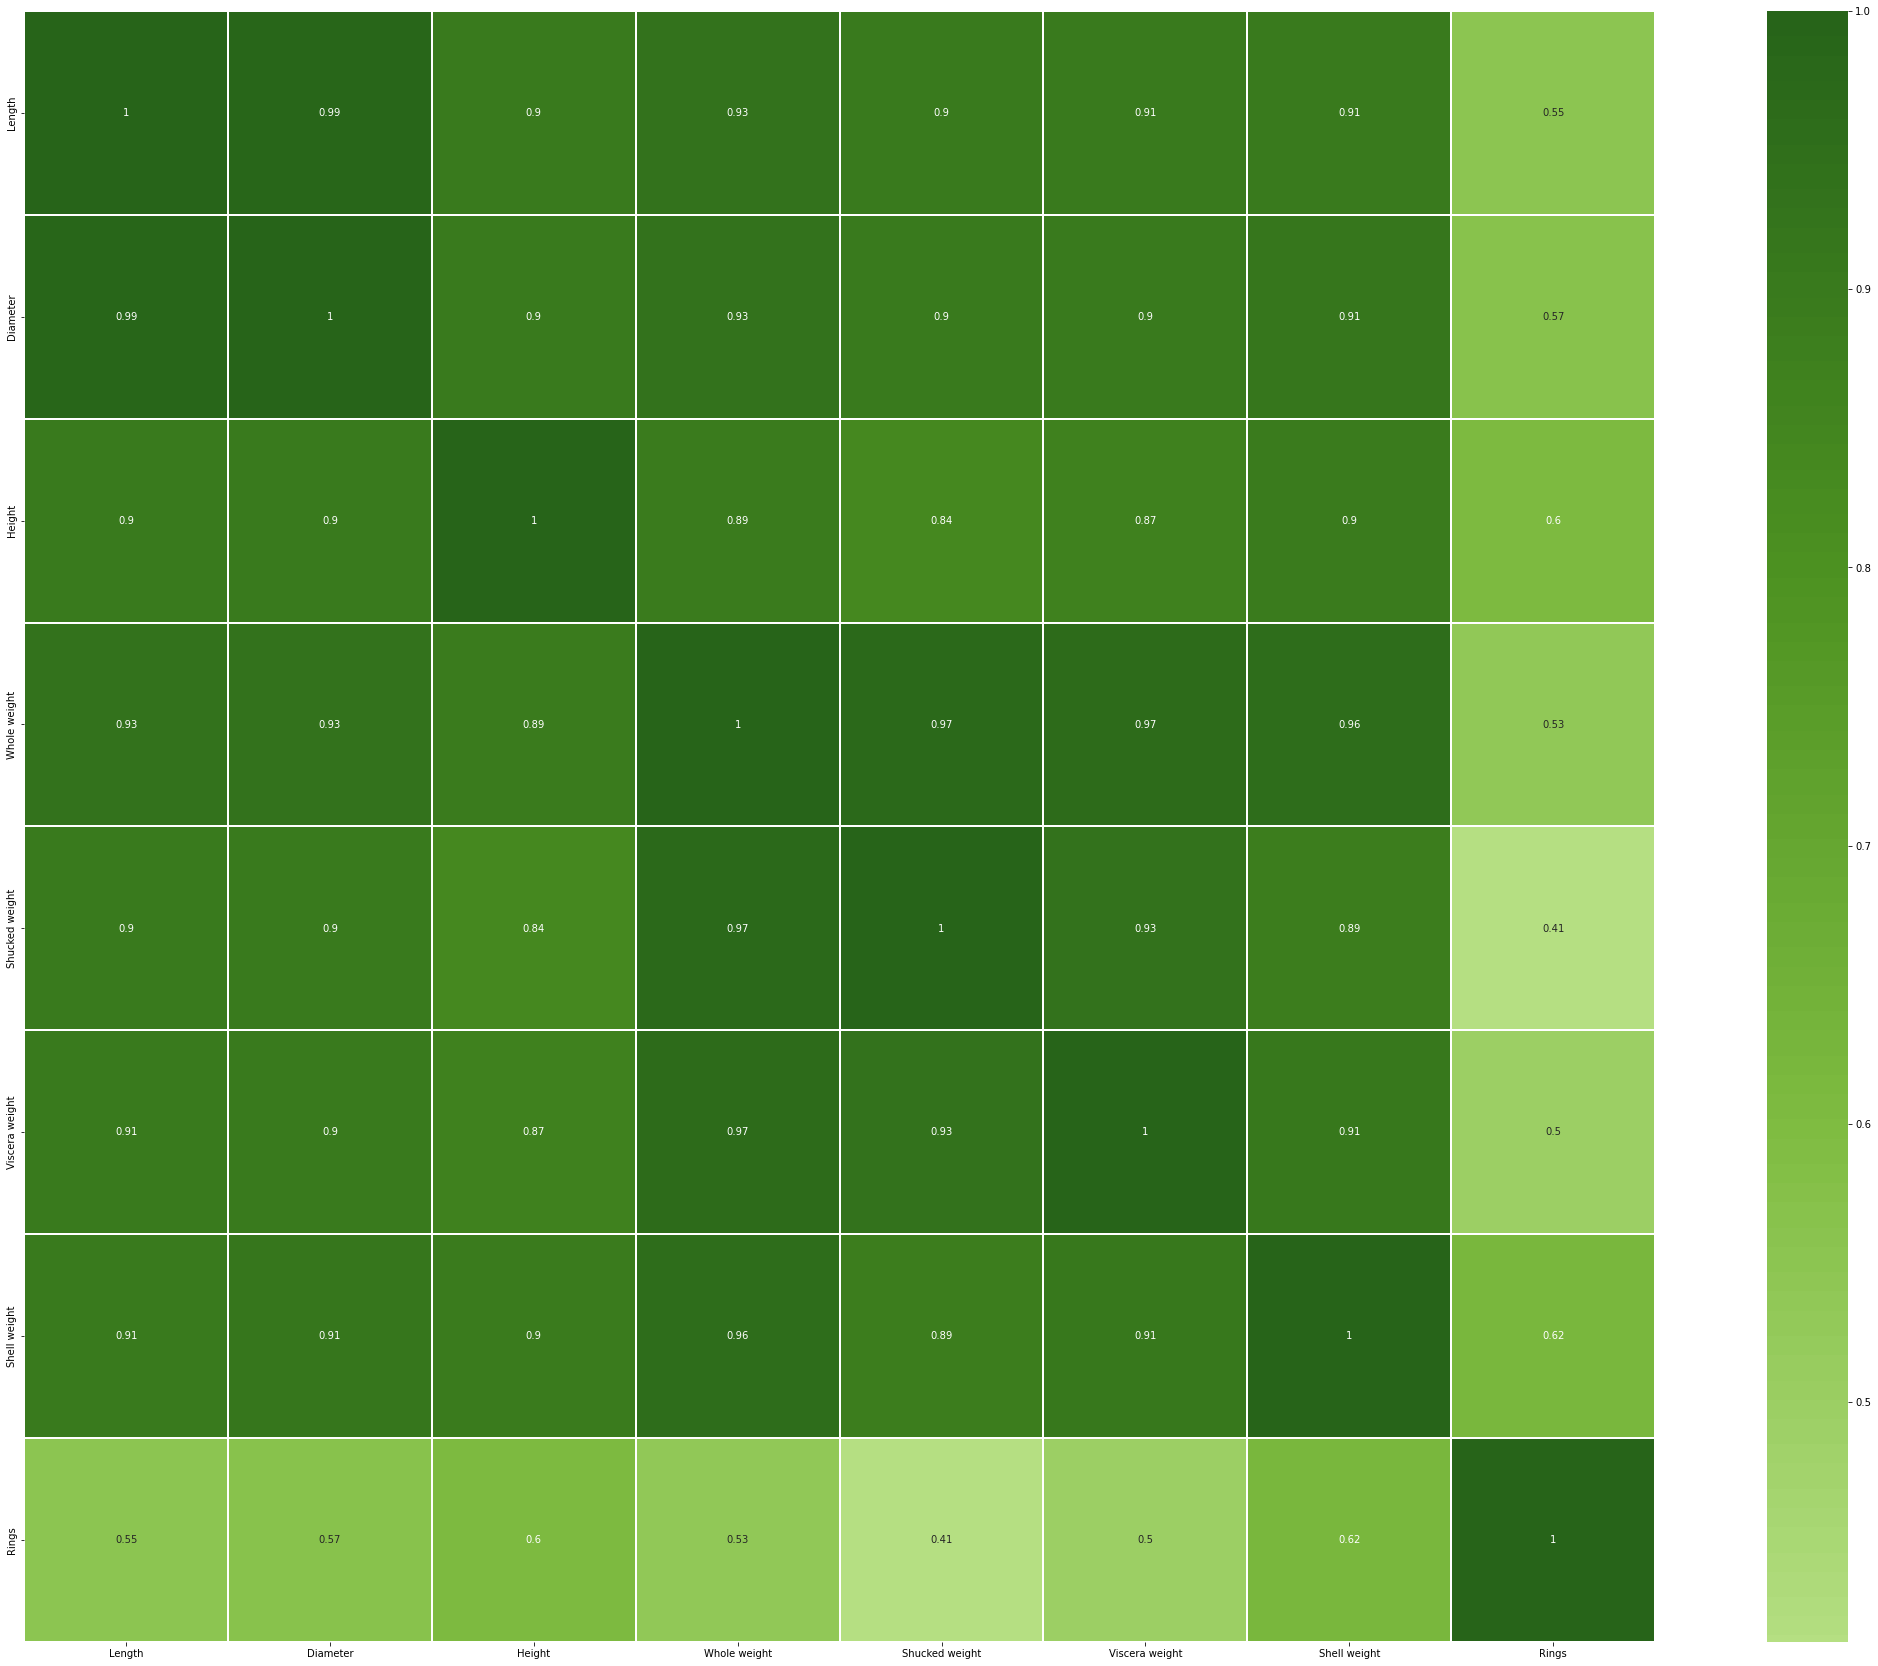

In [39]:
fig,ax = plt.subplots(1,1,figsize=(40,30))
sns.heatmap(df.corr(), square=True, linewidth=0.1, cmap="PiYG", ax=ax, annot=True, center=0)
plt.show()

### More EDA

#### Correlations between different variables. 

<AxesSubplot:xlabel='Length', ylabel='Rings'>

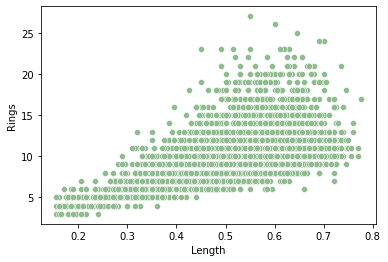

In [40]:
pal =sns.set_palette(sns.color_palette(['#8FBC8F']))
sns.scatterplot(x='Length', y='Rings', data=df)

<AxesSubplot:xlabel='Diameter', ylabel='Rings'>

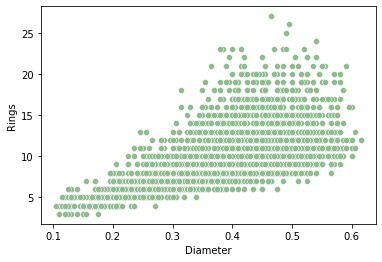

In [41]:
sns.scatterplot(x='Diameter', y='Rings', data=df)

<AxesSubplot:xlabel='Height', ylabel='Rings'>

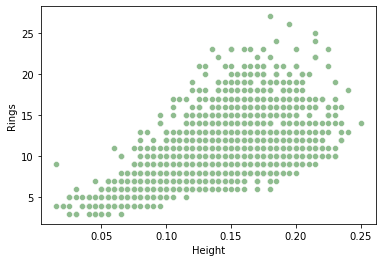

In [42]:
sns.scatterplot(x='Height', y='Rings', data=df)

<AxesSubplot:xlabel='Shell weight', ylabel='Rings'>

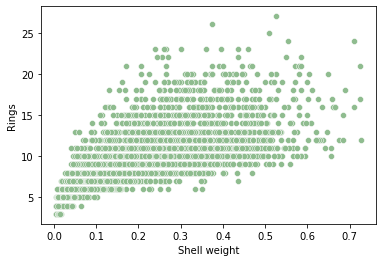

In [43]:
sns.scatterplot(x='Shell weight', y='Rings', data=df)

### Matrix of Scatterplots

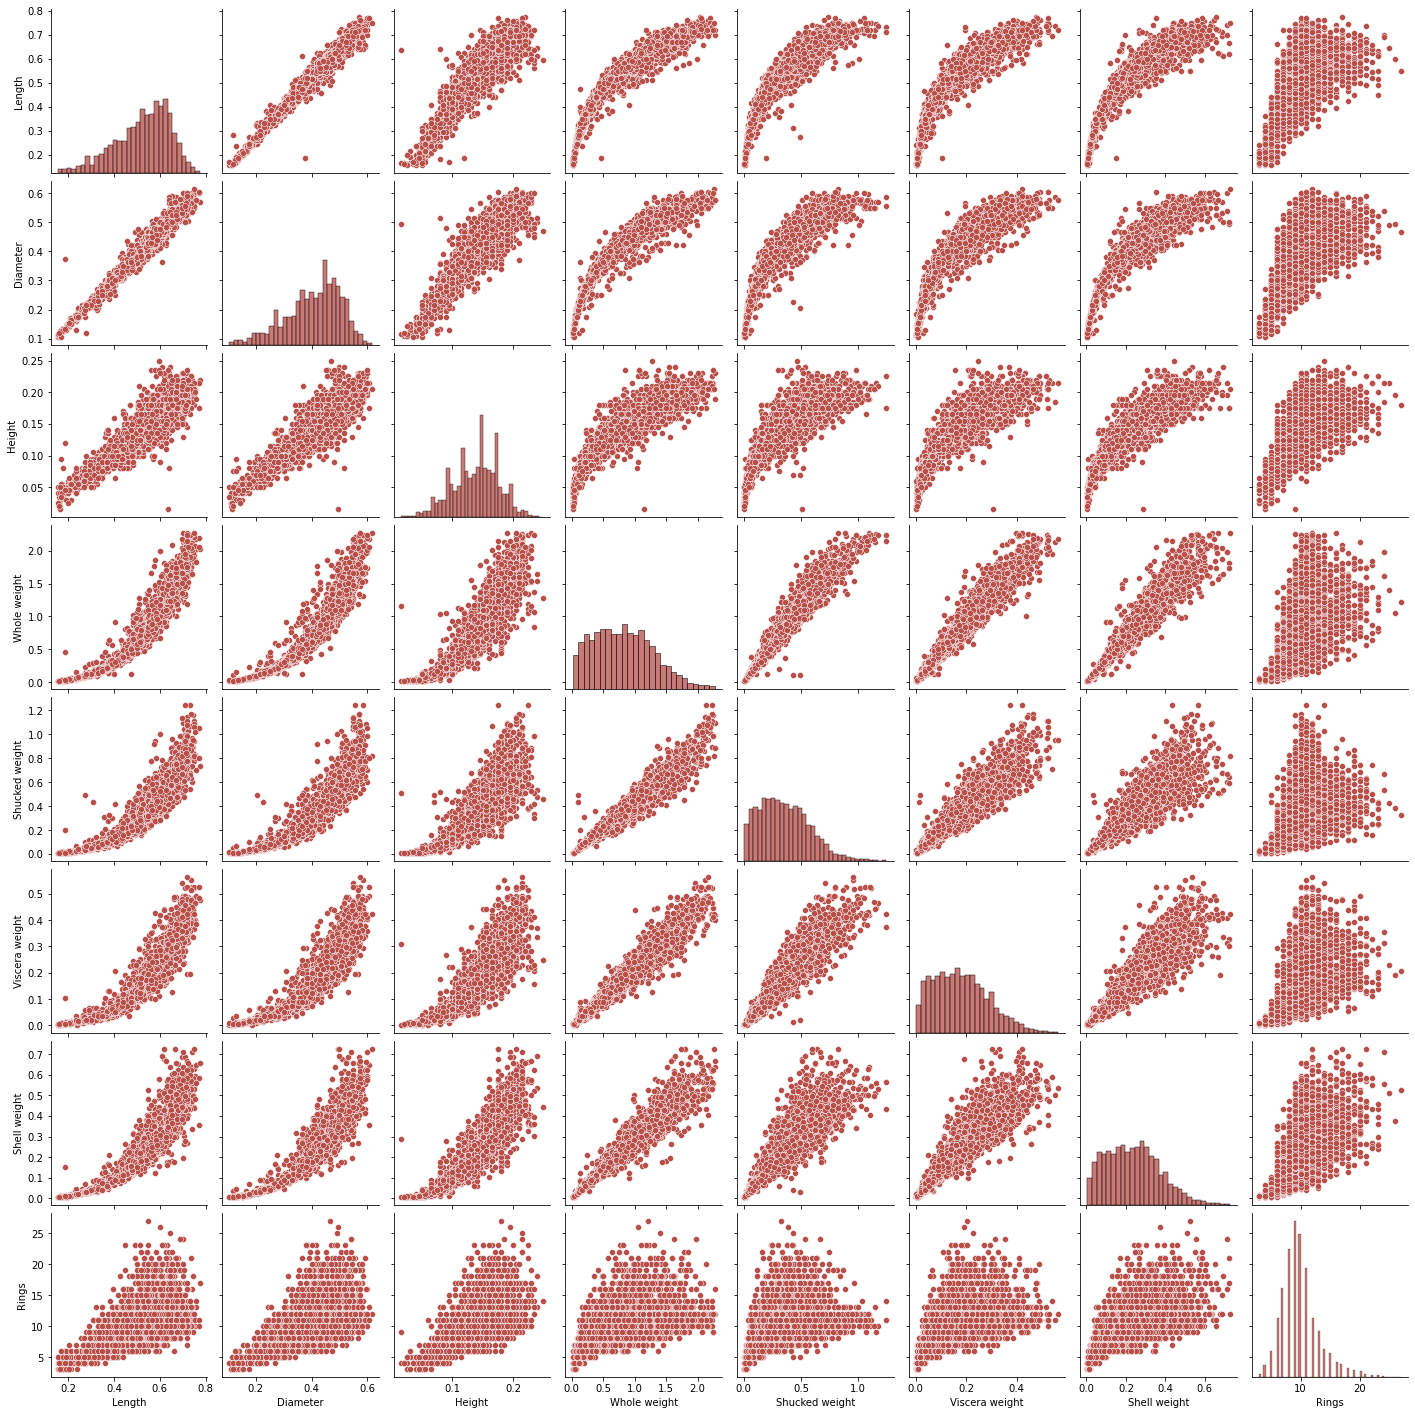

In [44]:
pal =sns.set_palette(sns.color_palette(['#B94E48']))
sns.pairplot(df)

There doesn't seem to be too many outliers. 

### Correlation Heatmap

<AxesSubplot:>

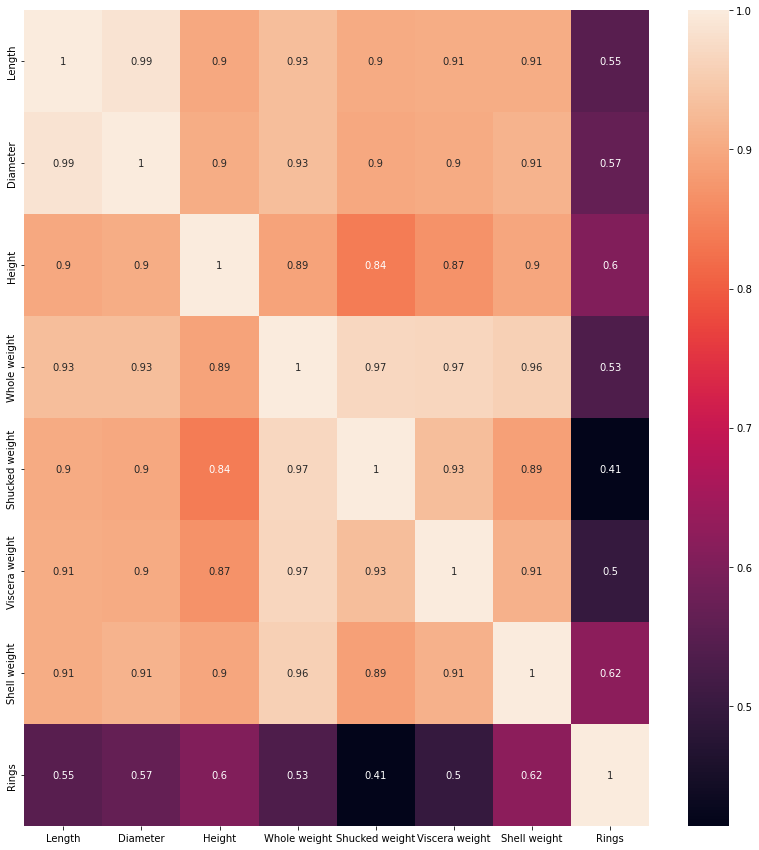

In [45]:
corr1 = df.corr()
corr = df.corr()
fig, ax = plt.subplots(figsize=(14, 15))
sns.heatmap(corr, annot=True)

In [46]:
numerical_values = ['Length', 'Diameter', 'Height', 'Whole weight','Shucked weight', 'Viscera weight', 'Shell weight', 'Rings' ]
numerical_df = df[numerical_values]
sex =pd.get_dummies(df['Sex'])
sex.columns = ['Male','Female','I']
df = pd.concat([numerical_df, sex], axis=1)
df.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Male,Female,I
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


<AxesSubplot:>

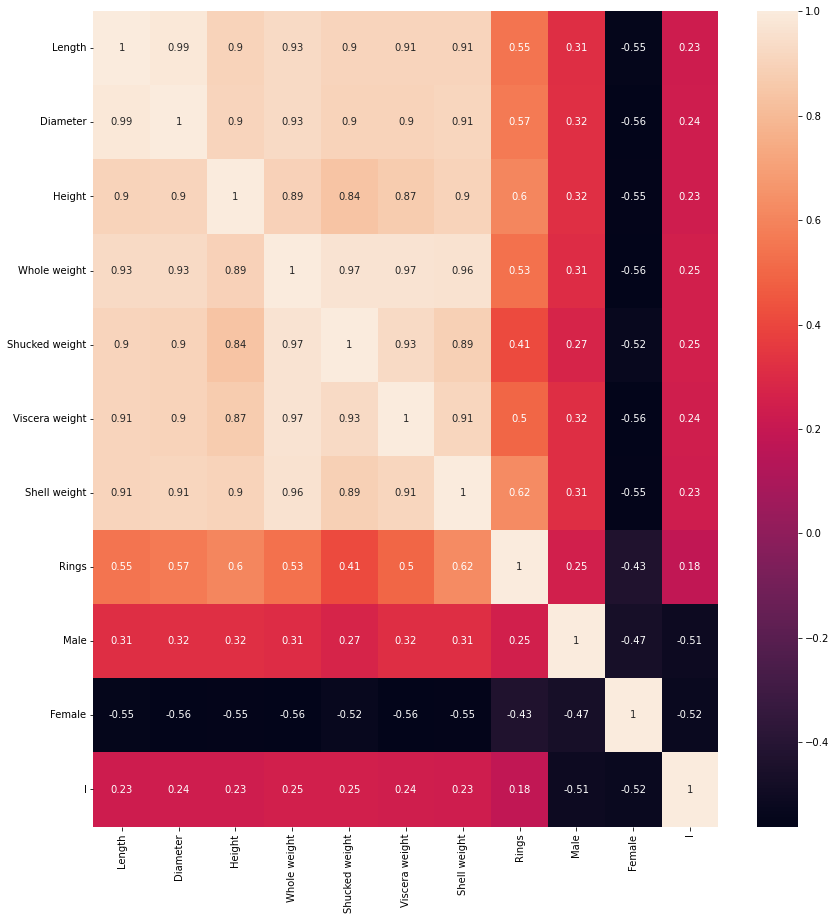

In [47]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(14, 15))
sns.heatmap(corr, annot=True)

#### Tell a story
My original hypothesis about diameter having the highest correlation with rings was incorrect.

Based on the correlations and heatmap, our target variables (Rings) has the most correlation with Shell Weight and Height, followed by Diameter and Length. 


#### Hypothesis
Abalone age (number of rings) has the most correlation with shell weight, the more the shell weighs the older the Abalone is. 


## Part 2

For an Abalone, the age directly correlates to it's rings. The "Rings" column will be seperated. If the number of rings is 9 or below, it will have a value of 0. If it is 10 or greater, it will have a value of 1. We will classify if the Abalone is younger or older based on the variables we have.

In [48]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Male,Female,I
count,4136.000000,4136.000000,4136.000000,4136.000000,4136.000000,4136.000000,4136.000000,4136.000000,4136.000000,4136.000000,4136.000000
mean,0.523309,0.407257,0.138965,0.819671,0.355376,0.178912,0.236207,9.914652,0.312863,0.322050,0.365087
std,0.117927,0.097525,0.037728,0.473572,0.214281,0.106661,0.134057,3.173076,0.463715,0.467319,0.481513
min,0.155000,0.105000,0.015000,0.014500,0.005000,0.000500,0.005000,3.000000,0.000000,0.000000,0.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093375,0.130000,8.000000,0.000000,0.000000,0.000000
50%,0.545000,0.425000,0.140000,0.796000,0.334500,0.170000,0.230750,9.000000,0.000000,0.000000,0.000000
75%,0.615000,0.480000,0.165000,1.145000,0.498500,0.250000,0.325000,11.000000,1.000000,1.000000,1.000000
max,0.775000,0.615000,0.250000,2.273000,1.245500,0.564000,0.726000,27.000000,1.000000,1.000000,1.000000


For the most part, the means for the variables are close together. However, for the target variable it is much higher. In order for all the variables to have comparible units, we will standardize the data before doing the model. 

KNN will be used with a pipeline. The first model will be done on the entire dataset, including categorical variables.  

### Standardization and Logistic Regression

In [49]:
X = df.drop(columns=['Rings']).values
y = df['Rings'].values
y = np.where(y > 9, 1, 0)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [51]:
log = LogisticRegression()
steps = [("scaler", StandardScaler()),
         ("Logistic", log)]
pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)

#### Confusion Matrix

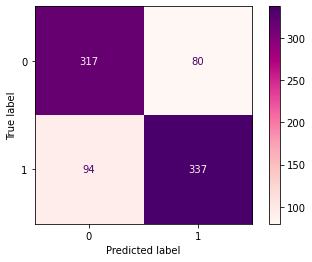

In [52]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, predictions, labels=pipeline.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=pipeline.classes_)
disp.plot(cmap='RdPu')
plt.show()

#### Accuracy Score, Classification Report and Mean Squared Error

In [53]:
print('Accuracy Score: ', accuracy_score(y_test, predictions))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R-squared:', metrics.r2_score(y_test, predictions))
print('Classification Report: \n', classification_report(y_test, predictions))

Accuracy Score:  0.7898550724637681
Mean Absolute Error: 0.21014492753623187
Mean Squared Error: 0.21014492753623187
Root Mean Squared Error: 0.4584156711285423
R-squared: 0.15800054936384844
Classification Report: 
               precision    recall  f1-score   support

           0       0.77      0.80      0.78       397
           1       0.81      0.78      0.79       431

    accuracy                           0.79       828
   macro avg       0.79      0.79      0.79       828
weighted avg       0.79      0.79      0.79       828



The accuracy score is 78.9%. 

In [54]:
df.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Male,Female,I
Length,1.000000,0.986337,0.898060,0.930667,0.903390,0.905841,0.906002,0.548226,0.311354,-0.547520,0.231534
Diameter,0.986337,1.000000,0.904398,0.930066,0.897538,0.901622,0.913474,0.566679,0.320075,-0.560673,0.235901
Height,0.898060,0.904398,1.000000,0.890992,0.838323,0.867667,0.896387,0.604287,0.317918,-0.554307,0.231799
Whole weight,0.930667,0.930066,0.890992,1.000000,0.969136,0.966373,0.958002,0.534088,0.307423,-0.561222,0.248619
Shucked weight,0.903390,0.897538,0.838323,0.969136,1.000000,0.930582,0.886020,0.413757,0.271879,-0.524782,0.247483
Viscera weight,0.905841,0.901622,0.867667,0.966373,0.930582,1.000000,0.912178,0.498454,0.315252,-0.557848,0.237804
Shell weight,0.906002,0.913474,0.896387,0.958002,0.886020,0.912178,1.000000,0.622123,0.312757,-0.552433,0.234951
Rings,0.548226,0.566679,0.604287,0.534088,0.413757,0.498454,0.622123,1.000000,0.248912,-0.433059,0.180582
Male,0.311354,0.320075,0.317918,0.307423,0.271879,0.315252,0.312757,0.248912,1.000000,-0.465070,-0.511677
Female,-0.547520,-0.560673,-0.554307,-0.561222,-0.524782,-0.557848,-0.552433,-0.433059,-0.465070,1.000000,-0.522642


The same model will be done again, but this time without the Sex variable. This is a categorical variable and it has the lowest correlation with our 'Rings' variable. 

In [55]:
X = df.drop(columns=['Rings', 'Male', 'Female', 'I']).values

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [57]:
pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)

#### Confusion Matrix

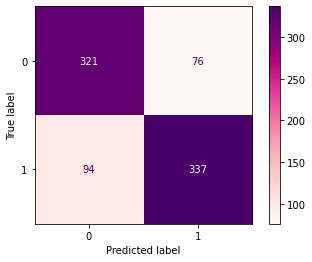

In [58]:
cm = confusion_matrix(y_test, predictions, labels=pipeline.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=pipeline.classes_)
disp.plot(cmap='RdPu')
plt.show()

#### Accuracy Score, Classification Report and Mean Squared Error

In [59]:
print('Accuracy Score: ', accuracy_score(y_test, predictions))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R-squared:', metrics.r2_score(y_test, predictions))
print('Classification Report: \n', classification_report(y_test, predictions))

Accuracy Score:  0.7946859903381642
Mean Absolute Error: 0.20531400966183574
Mean Squared Error: 0.20531400966183574
Root Mean Squared Error: 0.45311588988010093
R-squared: 0.17735685857387484
Classification Report: 
               precision    recall  f1-score   support

           0       0.77      0.81      0.79       397
           1       0.82      0.78      0.80       431

    accuracy                           0.79       828
   macro avg       0.79      0.80      0.79       828
weighted avg       0.80      0.79      0.79       828



The results are slightly better for this model. The accuracy increased from 78% to 79%, which is a very small change. The MSE and MAE decreased slightly. 

In [60]:
df.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Male,Female,I
Length,1.000000,0.986337,0.898060,0.930667,0.903390,0.905841,0.906002,0.548226,0.311354,-0.547520,0.231534
Diameter,0.986337,1.000000,0.904398,0.930066,0.897538,0.901622,0.913474,0.566679,0.320075,-0.560673,0.235901
Height,0.898060,0.904398,1.000000,0.890992,0.838323,0.867667,0.896387,0.604287,0.317918,-0.554307,0.231799
Whole weight,0.930667,0.930066,0.890992,1.000000,0.969136,0.966373,0.958002,0.534088,0.307423,-0.561222,0.248619
Shucked weight,0.903390,0.897538,0.838323,0.969136,1.000000,0.930582,0.886020,0.413757,0.271879,-0.524782,0.247483
Viscera weight,0.905841,0.901622,0.867667,0.966373,0.930582,1.000000,0.912178,0.498454,0.315252,-0.557848,0.237804
Shell weight,0.906002,0.913474,0.896387,0.958002,0.886020,0.912178,1.000000,0.622123,0.312757,-0.552433,0.234951
Rings,0.548226,0.566679,0.604287,0.534088,0.413757,0.498454,0.622123,1.000000,0.248912,-0.433059,0.180582
Male,0.311354,0.320075,0.317918,0.307423,0.271879,0.315252,0.312757,0.248912,1.000000,-0.465070,-0.511677
Female,-0.547520,-0.560673,-0.554307,-0.561222,-0.524782,-0.557848,-0.552433,-0.433059,-0.465070,1.000000,-0.522642


The two features that have the highest correlation with 'Rings' is Height and Shell Weight. 

In [61]:
X = df[['Shell weight', 'Height']].values

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [63]:
pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)

#### Confusion Matrix

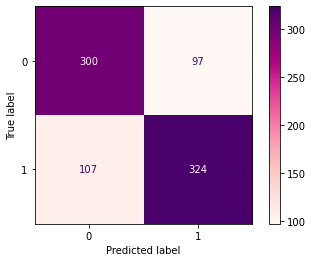

In [64]:
cm = confusion_matrix(y_test, predictions, labels=pipeline.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=pipeline.classes_)
disp.plot(cmap='RdPu')
plt.show()

#### Accuracy Score, Classification Report and Mean Squared Error

In [65]:
print('Accuracy Score: ', accuracy_score(y_test, predictions))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R-squared:', metrics.r2_score(y_test, predictions))
print('Classification Report: \n', classification_report(y_test, predictions))

Accuracy Score:  0.7536231884057971
Mean Absolute Error: 0.2463768115942029
Mean Squared Error: 0.2463768115942029
Root Mean Squared Error: 0.4963635881027162
R-squared: 0.012828230288649878
Classification Report: 
               precision    recall  f1-score   support

           0       0.74      0.76      0.75       397
           1       0.77      0.75      0.76       431

    accuracy                           0.75       828
   macro avg       0.75      0.75      0.75       828
weighted avg       0.75      0.75      0.75       828



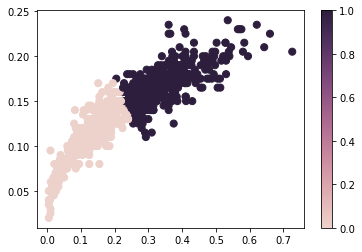

In [66]:
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(
    X_test[:, 0], X_test[:, 1], c=predictions, s=50, cmap=cmap
)
f.colorbar(points)
plt.show()

The scatter plot below shows the shell weight values on the X and height on the y. The colors are if the data point is either 0 or 1 (young or old). As the height and shell weight increase the age also increases. 

The above model is done using the 2 most correlated variables. However, the accuracy decreased to 75% and the MSE increased. Despite using the 2 best features, the model performance was worse. 

The model below is done using the 4 most correlated variables.

In [67]:
X = df[['Diameter', 'Shell weight', 'Height', 'Length']].values

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [69]:
pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)

#### Confusion Matrix

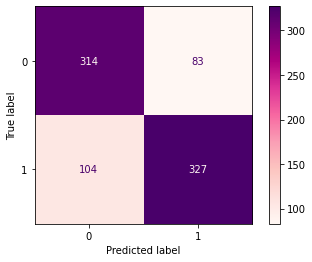

In [70]:
cm = confusion_matrix(y_test, predictions, labels=pipeline.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=pipeline.classes_)
disp.plot(cmap='RdPu')
plt.show()

#### Accuracy Score, Classification Report and Mean Squared Error

In [71]:
print('Accuracy Score: ', accuracy_score(y_test, predictions))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R-squared:', metrics.r2_score(y_test, predictions))
print('Classification Report: \n', classification_report(y_test, predictions))

Accuracy Score:  0.7741545893719807
Mean Absolute Error: 0.22584541062801933
Mean Squared Error: 0.22584541062801933
Root Mean Squared Error: 0.47523195455274186
R-squared: 0.09509254443126236
Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.79      0.77       397
           1       0.80      0.76      0.78       431

    accuracy                           0.77       828
   macro avg       0.77      0.77      0.77       828
weighted avg       0.78      0.77      0.77       828



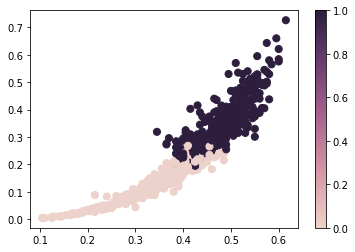

In [72]:
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(
    X_test[:, 0], X_test[:, 1], c=predictions, s=50, cmap=cmap
)
f.colorbar(points)
plt.show()

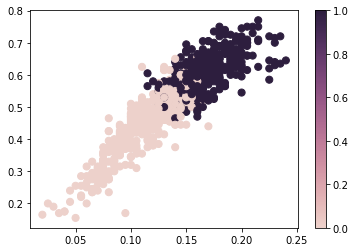

In [73]:
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(
    X_test[:, 2], X_test[:, 3], c=predictions, s=50, cmap=cmap
)
f.colorbar(points)
plt.show()

The accuracy increased slightly to 77% with 4 of the most correlated values. 

#### Conclusion

In order to predict the age of the Abalone, it is better to use all of the numerical variables. Using the 2 variables that have a high correlation with the number of rings does not give the best accuracy. Including the Sex category, even after making dummy variables, results in a lower accuracy then when it was excluded. This is not to say that Sex is not important, but whether an Abalone is younger or older can still be determined without it. For the numerical variables, as the measurements increased, the Abalone tended to be older. 